<a href="https://colab.research.google.com/github/Vaycold/statistics_seminar/blob/main/tempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

In [65]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
os.environ['KAGGLE_USERNAME'] = 'kimgodbang'
os.environ['KAGGLE_KEY'] = '1c0e1716b23829d4381dcbced37ba49b'

In [3]:
!rm *.*
!kaggle competitions download -c sentiment-analysis-of-covid-19-related-tweets
#!unzip '*.zip'

#df_case = pd.read_csv('RAW_global_confirmed_cases.csv')
#df_death = pd.read_csv('RAW_global_deaths.csv')

rm: cannot remove '*.*': No such file or directory
  0% 0.00/518k [00:00<?, ?B/s]
100% 518k/518k [00:00<00:00, 58.2MB/s]
  0% 0.00/254k [00:00<?, ?B/s]
100% 254k/254k [00:00<00:00, 79.5MB/s]


In [12]:
import pandas as pd

'''
# 0 : Optimistic / 낙관적인
# 1 : Thankful   / 감사하는
# 2 : Empathetic / 감정이입
# 3 : Pessimistic / 비관적인
# 4 : Anxious    / 불안
# 5 : Sad        / 슬픔
# 6 : Annoyed    / 즐거움
# 7 : Denial     / 부정적인
# 8 : Surprise   / 놀라다
# 9 : Official report / 공식적인 발표
# 10 : Joking    / 농담
'''
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('validation.csv')

## EDA

In [9]:
train_df.head()

,ID,Tweet,Labels
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10
1,2,BanMediaHouse whose is responsible for spreadi...,6
2,3,Im waiting for someone to say to me that all t...,3 4
3,4,He is a liar. Proven day night. Time again. Li...,6
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8


In [108]:
train_df.shape

(5000, 5)

In [109]:
test_df.shape

(2500, 2)

In [10]:
test_df.head()

,ID,Tweet
0,5001,Forgot to a math test and I was failing but my...
1,5002,Corona effected came from Delhi in Bihar lakhi...
2,5003,Make CORONA END NA
3,5004,Imagine if the coronavirus pandemic was a big ...
4,5005,Howdy Ana. Where can I get married during the ...


In [21]:
#keras.utils.to_categorical(train_df['Labels'][0])

In [75]:
train_df['label']  = train_df['Labels'].apply(lambda x :  labelsplit(x))

In [125]:
train_df.head()

,ID,Tweet,Labels,label,onehot
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,"[0, 10]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
1,2,BanMediaHouse whose is responsible for spreadi...,6,[6],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
2,3,Im waiting for someone to say to me that all t...,3 4,"[3, 4]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]"
3,4,He is a liar. Proven day night. Time again. Li...,6,[6],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,[8],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"


In [40]:
for a in train_df['Labels'][2].replace(' ',',').split(',') :
    print(int(a))

3
4


In [55]:
def labelsplit(labels) :
    
    label = labels.replace(' ',',').split(',')
    for idx, lab in enumerate(label) :
        label[idx] = int(lab)
    return label

In [86]:
def lab2onehot(labels) :
    onehot = [0 for i in range(11)]
    label = labels.replace(' ',',').split(',')
    for value in label :
        onehot[int(value)] = 1
    
    return onehot

In [80]:
lab2onehot()

[None, None, None, None, None, None, None, None, None, None, None]

In [82]:
train_df['Labels'][0]

'0 10'

In [87]:
lab2onehot(train_df['Labels'][0])

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [70]:
labelsplit(train_df['Labels'][1822])

[5, 10]

In [88]:
train_df.head()

,ID,Tweet,Labels,label
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,"[0, 10]"
1,2,BanMediaHouse whose is responsible for spreadi...,6,[6]
2,3,Im waiting for someone to say to me that all t...,3 4,"[3, 4]"
3,4,He is a liar. Proven day night. Time again. Li...,6,[6]
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,[8]


In [89]:
train_df['onehot']  = train_df['Labels'].apply(lambda x :  lab2onehot(x))

In [123]:
train_df.to_csv('train_df.csv',index=False)

In [124]:
pd.read_csv('train_df.csv')

,ID,Tweet,Labels,label,onehot
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,"[0, 10]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
1,2,BanMediaHouse whose is responsible for spreadi...,6,[6],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
2,3,Im waiting for someone to say to me that all t...,3 4,"[3, 4]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]"
3,4,He is a liar. Proven day night. Time again. Li...,6,[6],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,[8],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
...,...,...,...,...,...
4995,4996,Life Insurance? I wonder if policies are payin...,4 5 7,"[4, 5, 7]","[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]"
4996,4997,My cousin passed away from the corona virus to...,4 5,"[4, 5]","[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]"
4997,4998,I guess Mother Nature really hates us. Yellows...,3 5 9 10,"[3, 5, 9, 10]","[0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1]"
4998,4999,So question for the day that isnt related to c...,9 10,"[9, 10]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]"


In [91]:
train_df.head(20)

,ID,Tweet,Labels,label,onehot
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10,"[0, 10]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
1,2,BanMediaHouse whose is responsible for spreadi...,6,[6],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
2,3,Im waiting for someone to say to me that all t...,3 4,"[3, 4]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]"
3,4,He is a liar. Proven day night. Time again. Li...,6,[6],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8,[8],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
5,6,Coronavirus impact Govt extends I-T deadlines ...,5 8,"[5, 8]","[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]"
6,7,"42,000 people might have died in China from Co...",6 7 8,"[6, 7, 8]","[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]"
7,8,Dear Chinese! Kindly cook your bat thoroughly ...,5 10,"[5, 10]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]"
8,9,This is how the govt of kenya is checking the ...,3 6 9,"[3, 6, 9]","[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]"
9,10,My mental health hasn't suffered at all under ...,10,[10],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"


In [112]:
list_ = [len(train_df['Tweet'][i]) for i in range(5000)]

<BarContainer object of 5000 artists>

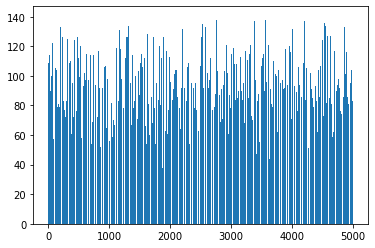

In [120]:
import matplotlib.pyplot as plt
plt.bar(
    range(5000), list_
)

In [106]:
train_df['Tweet'][0]

'NO JOKE I WILL HOP ON A PLANE RN! (Well after COVID19 lol)'